<a href="https://colab.research.google.com/github/mitinull/polyp-segmentation-AI-Project-/blob/main/polyp_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import cv2

import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

# Dataset Familiarization

In [2]:
# Define directories of images and masks

IMGS_DIR = './drive/MyDrive/Kvasir-SEG/images/'
MSKS_DIR = './drive/MyDrive/Kvasir-SEG/masks/'

In [3]:
# Generate full path for all images and masks
# Sort paths to make coresponding images and mask

imgs_paths = [IMGS_DIR + filename for filename in sorted(os.listdir(IMGS_DIR))]
msks_paths = [MSKS_DIR + filename for filename in sorted(os.listdir(MSKS_DIR))]
print(imgs_paths[:3])
print(msks_paths[:3])

['./drive/MyDrive/Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/images/cju0qx73cjw570799j4n5cjze.jpg']
['./drive/MyDrive/Kvasir-SEG/masks/cju0qkwl35piu0993l0dewei2.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qoxqj9q6s0835b43399p4.jpg', './drive/MyDrive/Kvasir-SEG/masks/cju0qx73cjw570799j4n5cjze.jpg']


In [4]:
# Generate a random index

img_idx = random.randint(0, len(imgs_paths) - 1)
img_idx

490

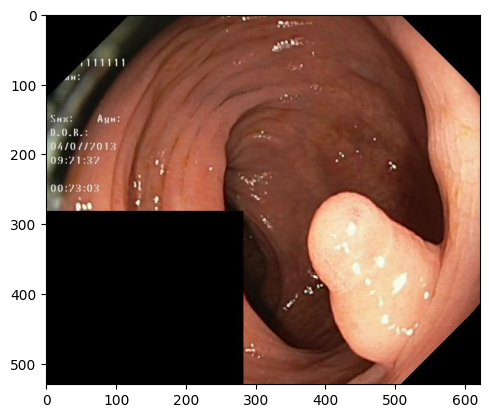

In [6]:
# Read an image and show it

# Read the image using OpenCV
img = cv2.imread(imgs_paths[img_idx])

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.show()


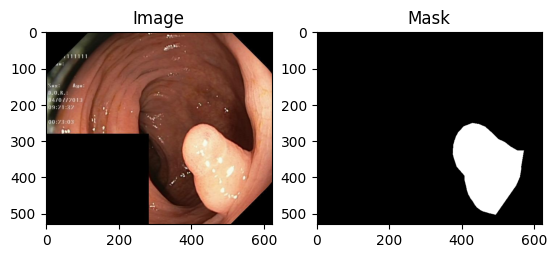

In [7]:
# Show the image and its mask together

# Read the corresponding mask
msk = cv2.imread(msks_paths[img_idx], 0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the image in the first subplot
ax1.imshow(img_rgb)
ax1.set_title('Image')

# Display the mask in the second subplot
ax2.imshow(msk, cmap='gray')
ax2.set_title('Mask')

# Show the figure
plt.show()


# Train-Validation-Test Split

In [8]:
# Split the data into train, validation, and test sets

imgs_paths_train, imgs_paths_valtest, msks_paths_train, msks_paths_valtest = train_test_split(imgs_paths, msks_paths, test_size=0.2, random_state=42)
imgs_paths_val, imgs_paths_test, msks_paths_val, msks_paths_test = train_test_split(imgs_paths_valtest, msks_paths_valtest, test_size=0.5, random_state=42)

print(f"imgs_train: {len(imgs_paths_train)}")
print(f"msks_train: {len(msks_paths_train)}")
print(f"imgs_val: {len(imgs_paths_val)}")
print(f"msks_val: {len(msks_paths_val)}")
print(f"imgs_test: {len(imgs_paths_test)}")
print(f"msks_test: {len(msks_paths_test)}")

imgs_train: 800
msks_train: 800
imgs_val: 100
msks_val: 100
imgs_test: 100
msks_test: 100


# Load Data

In [10]:
# Read the images and masks

imgs_train = [cv2.imread(path) for path in tqdm(imgs_paths_train)]
msks_train = [cv2.imread(path, 0) for path in tqdm(msks_paths_train)]

imgs_val = [cv2.imread(path) for path in tqdm(imgs_paths_val)]
msks_val = [cv2.imread(path, 0) for path in tqdm(msks_paths_val)]

imgs_test = [cv2.imread(path) for path in tqdm(imgs_paths_test)]
msks_test = [cv2.imread(path, 0) for path in tqdm(msks_paths_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
np.unique(msks_test[8])

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

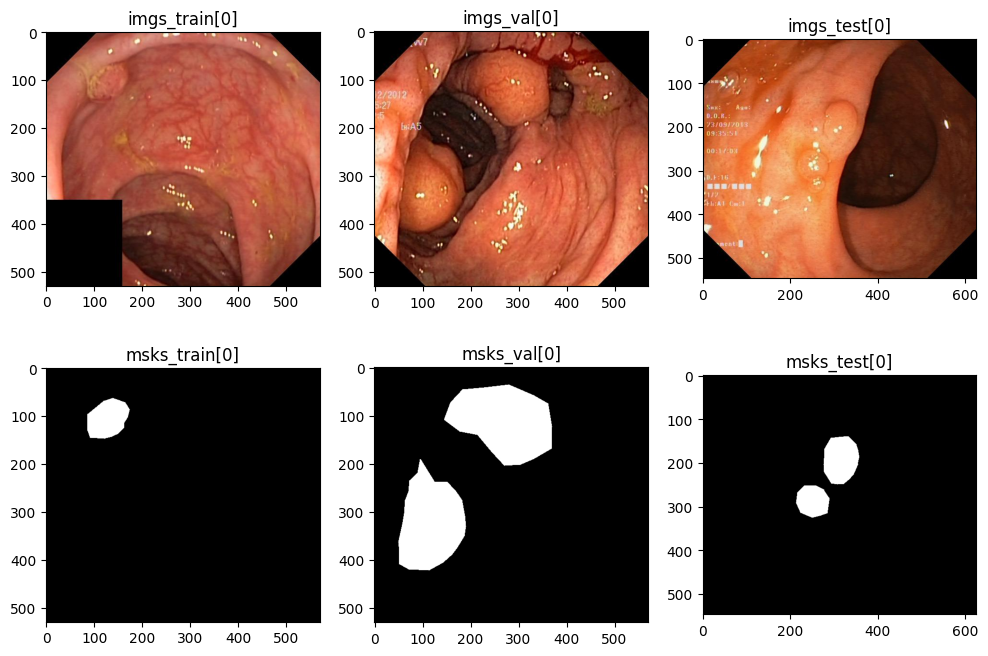

In [12]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()


# Preprocessing

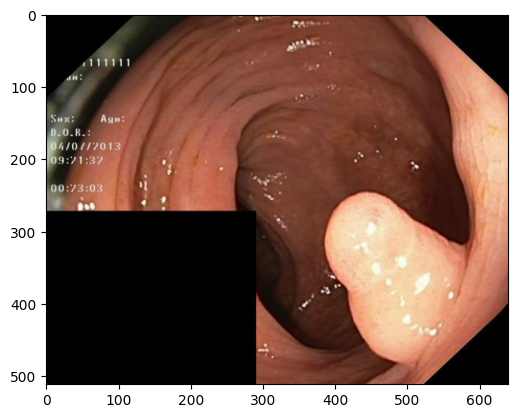

In [14]:
# Regarding to the article re-scaled to 640 × 512,
# which respects the predominant rectangular aspect ratio
# in most polyp segmentation datasets

IMG_WIDTH = 640
IMG_HEIGHT = 512

resized_img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# Apply resize function to all lists

imgs_train = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_train)]
msks_train = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_train)]

imgs_val = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_val)]
msks_val = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_val)]

imgs_test = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_test)]
msks_test = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [67]:
# Convert masks lists to binary (zero and one)

msks_train = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_train)]
msks_val = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_val)]
msks_test = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_test)]


  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [68]:
# Print shape of images inside each list

print(f"shape of images in imgs_train: {imgs_train[0].shape}")
print(f"shape of images in msks_train: {msks_train[0].shape}")
print(f"shape of images in imgs_val: {imgs_val[0].shape}")
print(f"shape of images in msks_val: {msks_val[0].shape}")
print(f"shape of images in imgs_test: {imgs_test[0].shape}")
print(f"shape of images in msks_test: {msks_test[0].shape}")


shape of images in imgs_train: (512, 640, 3)
shape of images in msks_train: (512, 640)
shape of images in imgs_val: (512, 640, 3)
shape of images in msks_val: (512, 640)
shape of images in imgs_test: (512, 640, 3)
shape of images in msks_test: (512, 640)


In [69]:
np.unique(msks_train[12])

array([0, 1], dtype=uint8)

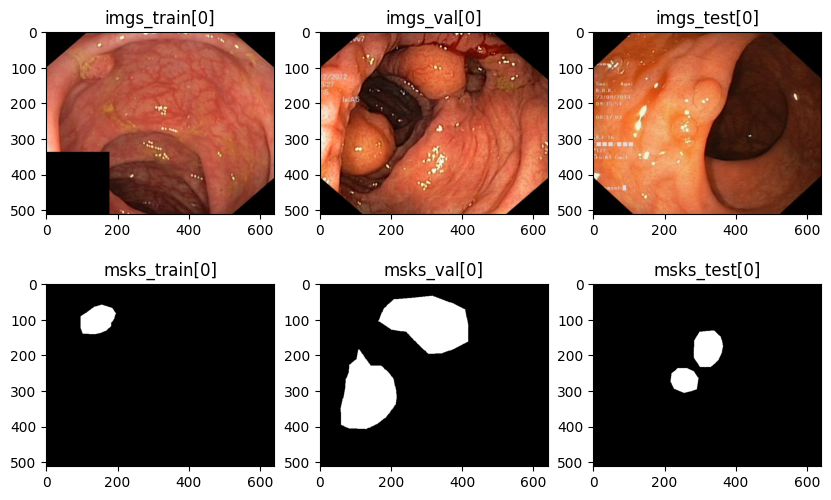

In [70]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()

# Model Selection and Implementation (U-Net)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [71]:
def double_conv_block(x, n_filters):

  # Conv2D then ReLU activation
  x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
  # Conv2D then ReLU activation
  x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

  return x

def downsample_block(x, n_filters):
  f = double_conv_block(x, n_filters)
  p = layers.MaxPool2D(2)(f)
  p = layers.Dropout(0.3)(p)

  return f, p

def upsample_block(x, conv_features, n_filters):
  # upsample
  x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
  # concatenate
  x = layers.concatenate([x, conv_features])
  # dropout
  x = layers.Dropout(0.3)(x)
  # Conv2D twice with ReLU activation
  x = double_conv_block(x, n_filters)

  return x

def build_unet_model():
  # inputs
  inputs = layers.Input(shape=(512,640,3))

  # encoder: contracting path - downsample
  # 1 - downsample
  f1, p1 = downsample_block(inputs, 64)
  # 2 - downsample
  f2, p2 = downsample_block(p1, 128)
  # 3 - downsample
  f3, p3 = downsample_block(p2, 256)
  # 4 - downsample
  f4, p4 = downsample_block(p3, 512)

  # 5 - bottleneck
  bottleneck = double_conv_block(p4, 1024)

  # decoder: expanding path - upsample
  # 6 - upsample
  u6 = upsample_block(bottleneck, f4, 512)
  # 7 - upsample
  u7 = upsample_block(u6, f3, 256)
  # 8 - upsample
  u8 = upsample_block(u7, f2, 128)
  # 9 - upsample
  u9 = upsample_block(u8, f1, 64)

  # outputs
  outputs = layers.Conv2D(2, 1, padding="same", activation = "softmax")(u9)

  # unet model with Keras Functional API
  unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

  return unet_model

In [75]:
unet_model = build_unet_model()

1/1 [==============================] - 7s 7s/step


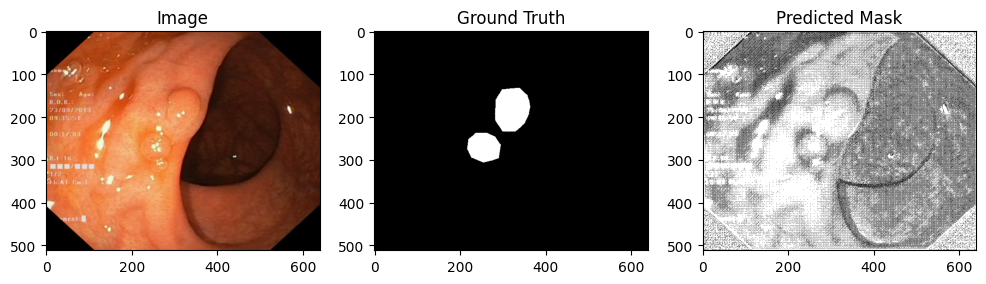

In [76]:
# Predict an image before training to see if model is working

image = imgs_test[0]
mask = msks_test[0]

# Predict the mask
predicted_mask = unet_model.predict(np.expand_dims(image, axis=0))[0]

# Convert the predicted mask to a showable image
predicted_mask = np.argmax(predicted_mask, axis=-1)

# Show the image, ground truth, and predicted mask
plt.figure(figsize=(12, 8))

# Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')

# Ground truth
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Ground Truth')

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')

plt.show()


In [77]:
np.unique(predicted_mask)

array([0, 1])

# Training and Validation

In [78]:
# Compile unet_model using Intersection over Union

unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="binary_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.MeanIoU(num_classes=2)])

In [79]:
# prompt: train model

history = unet_model.fit(
    np.array(imgs_train),
    np.array(msks_train),
    batch_size=16,
    epochs=1,
    validation_data=(np.array(imgs_val), np.array(msks_val)),
)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((16, 512, 640, 2) vs (16, 512, 640)).
